# Control theory and Vicsek Model - Studying the states of flocks

# Import libraries

In [19]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

In [20]:
# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils

# Launching a simulation 

In [21]:
# Initialize the Vicsek model.
radius = 1
L = 5
N = 30


In [22]:
# simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3)
simulator = pid.PID_Flock(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3)
# Simulate the Vicsek model.
simulationData = simulator.simulate(dt = 1, tmax=500)

# Extract the simulation data.
# time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [23]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,4.726916,1.125451,0.923513,1.455870,0.595545,4.228626,0.008265,2.623500,0.332266,...,-0.894851,0.446366,-0.955257,0.295778,0.066068,0.997815,0.976520,-0.215428,0.155278,0.987871
1,1.0,4.947613,1.328657,1.122301,1.680555,0.566991,3.929988,4.734100,2.745293,0.276356,...,-0.894851,0.446366,-0.955257,0.295778,0.066068,0.997815,0.976520,-0.215428,0.155278,0.987871
2,2.0,0.155337,1.545108,1.364942,1.856978,0.581826,3.630355,4.459052,2.865079,0.209071,...,-0.925843,0.377909,-0.994523,0.104516,0.066068,0.997815,0.960290,-0.279005,0.005417,0.999985
3,3.0,0.317497,1.797505,1.596049,2.048261,0.615267,3.332225,4.176937,2.967115,0.196160,...,-0.933536,0.358483,-0.968517,0.248947,0.066068,0.997815,0.937594,-0.347733,0.177290,0.984159
4,4.0,0.560086,1.974000,1.806979,2.261589,0.643598,3.033565,3.898427,3.078615,0.196709,...,-0.905582,0.424171,-0.972111,0.234521,0.287579,0.957757,0.943378,-0.331720,0.064646,0.997908


# Plotting clusters over time 

In [24]:
start = 0 # Start ITERATION
end = 150 # End ITERATION
df2 = df.loc[start:end]
df2.tail()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
146,146.0,3.572555,3.580790,4.521290,1.345224,0.895114,1.292977,3.734819,4.875573,4.969723,...,0.492659,0.870223,0.229585,0.973289,0.798360,0.602180,0.999618,0.027643,0.700273,0.713875
147,147.0,3.825717,3.741752,4.803008,1.448352,1.148145,1.131808,3.867369,0.144702,0.234493,...,0.399886,0.916565,0.177554,0.984111,0.775188,0.631730,0.999682,0.025229,0.699002,0.715119
148,148.0,4.078898,3.902686,0.081884,1.558932,1.420455,1.005920,3.992428,0.417393,0.475578,...,0.473456,0.880817,0.194935,0.980816,0.841713,0.539926,0.999368,-0.035546,0.730588,0.682818
149,149.0,4.334545,4.059671,0.366862,1.652674,1.665629,0.833035,4.116631,0.690475,0.753573,...,0.307046,0.951695,0.091020,0.995849,0.771876,0.635773,0.999726,0.023410,0.725788,0.687919
150,150.0,4.588126,4.219973,0.647670,1.758252,1.922628,0.678272,4.245555,0.961359,0.995519,...,0.387958,0.921677,0.267114,0.963665,0.816542,0.577286,0.999981,0.006201,0.714320,0.699819


In [25]:
from matplotlib import animation 

In [26]:

# pas très intéressant

# HIST_BINS = np.arange(-1, N, 1)
# HIST_RANGE = (-1, N)

# # Animation of the clustering distribution over time
# fig, ax = plt.subplots()
# ax.set_xlim(-1, 10)
# ax.set_ylim(0, 1)
# ax.set_xlabel('Cluster size')
# ax.set_ylabel('Frequency')
# ax.set_title('Cluster size distribution over time')
# ax.hist(matLabels[0], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)

# def animate(i):
#     ax.clear()
#     ax.set_xlim(-1, 10)
#     ax.set_ylim(0, 1)
#     ax.set_xlabel('Cluster size')
#     ax.set_ylabel('Frequency')
#     ax.set_title('Cluster size distribution over time')
#     ax.hist(matLabels[i], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)
#     return ax

# ani = animation.FuncAnimation(fig, animate, frames=t)
# ani.save('cluster_size_distribution.mp4', writer='ffmpeg', fps=10)

## Cluster of bird over time 

In [27]:
df_labels = utils.clusters_over_time(df, k_coef=2, L=L, min_samples=4)
# df_labels.to_csv('data/vicsek_labels.csv', index=False)

In [28]:
matLabels = df_labels.to_numpy()
color = []
for i, labels in enumerate(matLabels):
    color.append( utils.coloring_clusters(labels, cmap_name='hsv') )
color = np.array(color)
color.shape

c:\Users\nicos\OneDrive\Bureau\MAIN4\Stage\vicsek_control_theory\notebooks\..\utils.py:244: RuntimeWarning: divide by zero encountered in long_scalars
  colors = cmap(labels+1 / max(labels+1))


(501, 30, 4)

c:\Users\nicos\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


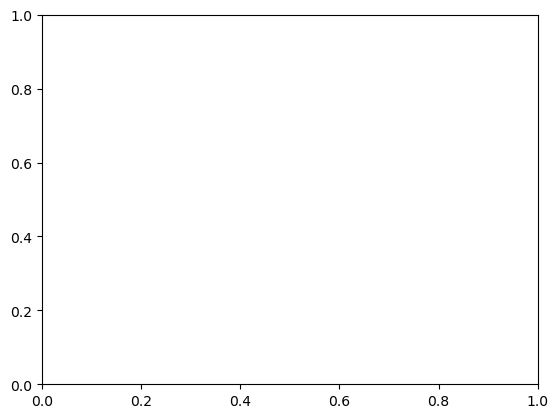

In [29]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()

def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')

    ax.scatter(x, y, c=color[i], cmap='hsv', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames = len(time))
# save as gi
# ani.save('data/pid_model.mp4', writer='ffmpeg', fps=20)
# ani.save('data/vicsek_model_normal.mp4', writer='ffmpeg', fps=20)

In [30]:
# Alphanumeric heuristic # 
def permute(line): 

    max = int(np.max(line))
    min = int(np.min(line)) 
    UNVISITED = -2
    permutation = np.zeros((max-min+1)) + UNVISITED
    for i in range(len(line)): 
        if permutation[int(line[i]-min)] == UNVISITED:
            permutation[int(line[i]-min)] = line[i]
        else :
            line[i] = permutation[int(line[i]-min)]
    return line



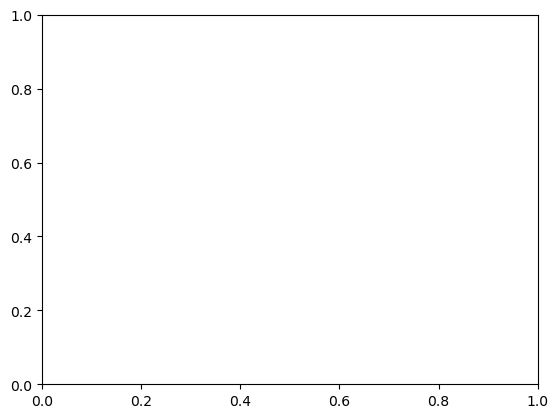

In [31]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()
matLabels = df_labels.to_numpy()
def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')
    col = permute(matLabels[i])
    ax.scatter(x, y, c=col, cmap='tab20', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames=end-start)
# ani.save('data/vicsek_model_alphanum.mp4', writer='ffmpeg', fps=20)

In [32]:
def cluster_effectif(matLabels):
    # effectif au cours du temps 
    max_cluster = np.max(matLabels)
    eff = np.zeros((df_labels.shape[0], max_cluster+1))
    noise = np.zeros(df_labels.shape[0])
    for t in range(df_labels.shape[0]):
        noise[t] = np.sum(matLabels[t] == -1)
        for i in range(max_cluster+1):
            eff[t][i] = np.sum(matLabels[t] == i)
    return eff, noise


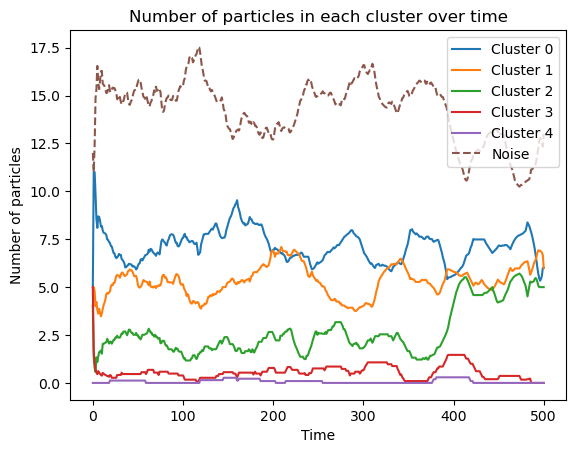

In [33]:
def plot_cluster_size_over_time(labels, lissage = 20):

    eff, noise = cluster_effectif(labels)
    max_cluster = np.max(labels)
    fig, ax = plt.subplots()
    for i in range(max_cluster+1):
        ax.plot(utils.lissage(eff[:, i], lissage), label=f'Cluster {i}')
    ax.plot(utils.lissage(noise, lissage), label='Noise', linestyle='--')
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of particles')
    ax.set_title('Number of particles in each cluster over time')
    ax.legend()
    plt.show()

plot_cluster_size_over_time(matLabels)

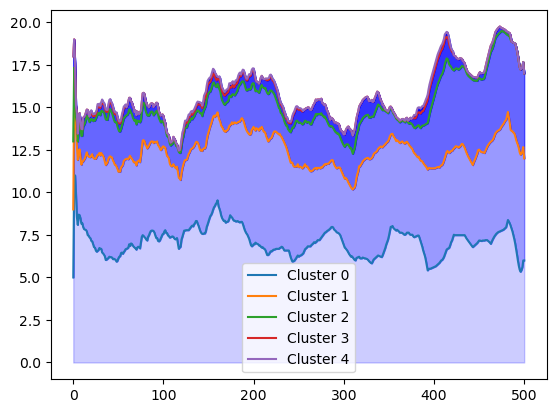

In [34]:
fig, ax = plt.subplots()
eff, noise = cluster_effectif(matLabels)
max_cluster = np.max(matLabels)
line = np.zeros(df_labels.shape[0])
ax.fill_between(np.arange(len(line)), line, 0, alpha=0.2)
for i in range(max_cluster+1):
    line += utils.lissage(eff[:, i], 20)
    ax.plot(line, label=f'Cluster {i}')
    up = line
    down = line - utils.lissage(eff[:,i], 20)
    ax.fill_between(np.arange(len(line)), up, down, alpha=(i+1)/(max_cluster+1), color='blue')
ax.legend()


In [35]:
df_centroids = pd.read_csv('../data_test/new_labels_centroids.csv')
df_contribution = pd.read_csv("../data_test/new_labels_contribions.csv")

# similarity 
centroidMat = df_centroids.to_numpy()
contributionMat = df_contribution.to_numpy()

# count all equal labels 
np.sum(centroidMat == contributionMat) / (centroidMat.shape[0] * centroidMat.shape[1])

0.8878243512974052

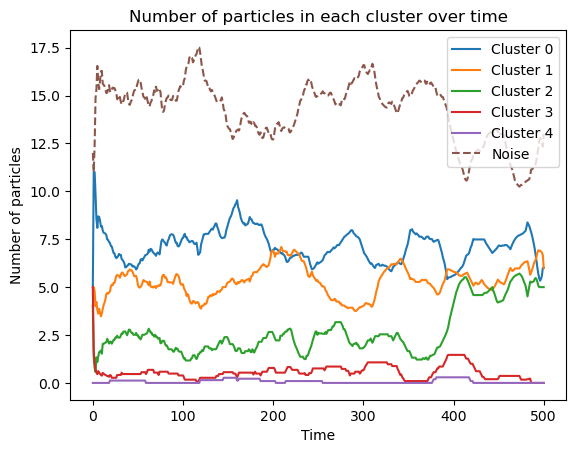

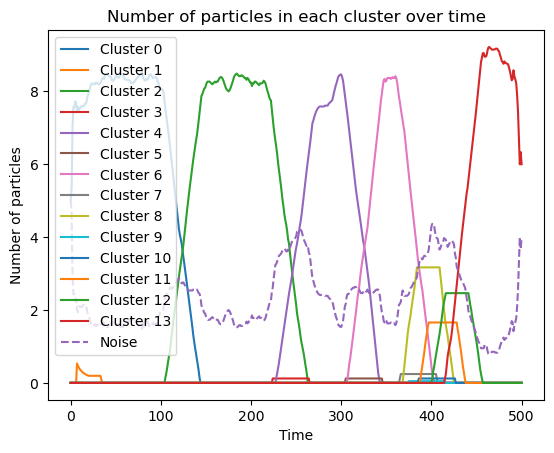

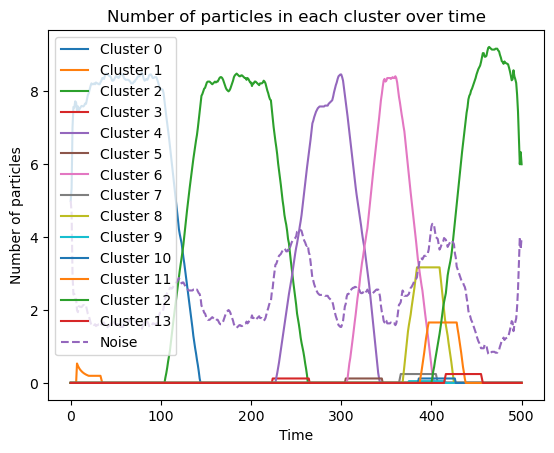

In [36]:
plot_cluster_size_over_time(matLabels)
plot_cluster_size_over_time(df_centroids.to_numpy())
plot_cluster_size_over_time(df_contribution.to_numpy())